<h1>光頭傑夫製作</h1><img src="https://rolqiw.bl.files.1drv.com/y4mYqkObWmQmdJFd8pab8t8m7d_mFhh3_YG63fiAnPaG6gjahHFt0n087pF97x1W2wemm7hd4ZdiPD2OxoPtqcCD_4-Jy-fojnt97kGGWR4Hnq0-9Ny61afd7WVHVTmF_9pcr45OFDFSwLKByeQU1q9TjwKk-HsNmWVsW1eGQ4Gi-9G4pQ5DYoTxswYJ5r5dLF-kKsA1InEyrqmV3kF5pm4WQ?width=658&height=584&cropmode=none" style='width:160px;margin:0'/>

# <span style="color:red ">爬蟲過後，我們總要把資料存起來
----------
## [目標網頁](https://www.imdb.com/chart/top?ref_=nv_mv_250_6)

# <span style="color:red "> <測驗題>

---
請先幫我連上線，確定一下要爬的區域?

### <span style="color:red "> <答案>

In [ ]:
from bs4 import BeautifulSoup
import requests

url = 'http://www.imdb.com/chart/top?ref_=nv_mv_250_6'

result = requests.get(url)
soup = BeautifulSoup(result.text,"lxml")

summary = soup.find('div',{'class':'article'})
summary

# <span style="color:red "> <測驗題>

---
先幫忙把下面三個東西找出來:  
     1.電影年份  
     2.電影評分  
     3.評分人總數 
    
---
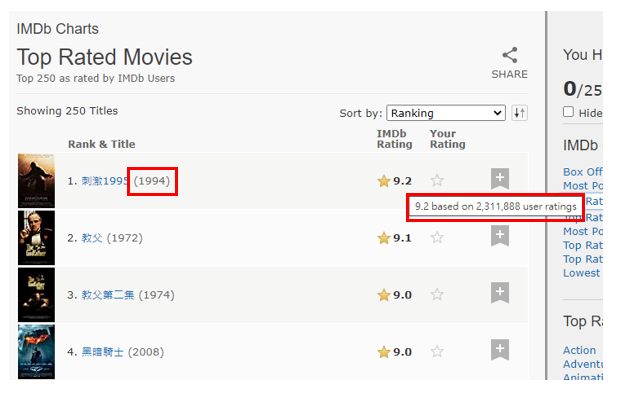

### <span style="color:red "> <答案>

In [ ]:
from bs4 import BeautifulSoup
import requests

url = 'http://www.imdb.com/chart/top?ref_=nv_mv_250_6'

result = requests.get(url)
text = result.text
soup = BeautifulSoup(text,"lxml")

summary = soup.find('div',{'class':'article'})

for row in summary.find('tbody').findAll('tr'):
    #把年份的資料提取出來
    sitem=row.find('span',{'class':'secondaryInfo'})
    s = sitem.text
    print(s[1:5])
        
    #把評分及評分人數取出來
    iget=row.find('strong')
    print(iget.text)
    print(iget.get('title').split(' ')[3])

# <span style="color:red "> <測驗題>

---
請幫忙把電影中文名和卡司名單弄出來
---
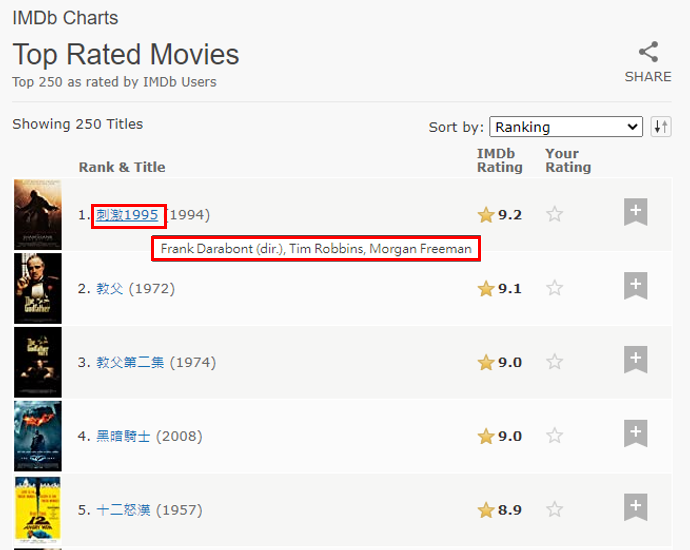

### <span style="color:red "> <答案>

In [ ]:
from bs4 import BeautifulSoup
import requests

url = 'http://www.imdb.com/chart/top?ref_=nv_mv_250_6'

result = requests.get(url)
text = result.text
soup = BeautifulSoup(text,"lxml")

summary = soup.find('div',{'class':'article'})

for row in summary.find('tbody').findAll('tr'):     
        target=row.find('td',{'class':'titleColumn'}).find('a')          
        #把中文名字存出來
        print(target.text)           
        #把卡司存出來
        print(target.get('title'))

# <span style="color:red "> <測驗題>

---
點進去電影頁以後，取出幾個資訊:  
    1.電影簡介說明  
    2.電影關鍵字  
    3.電影時間長度  
    4.電影英文名字  
----
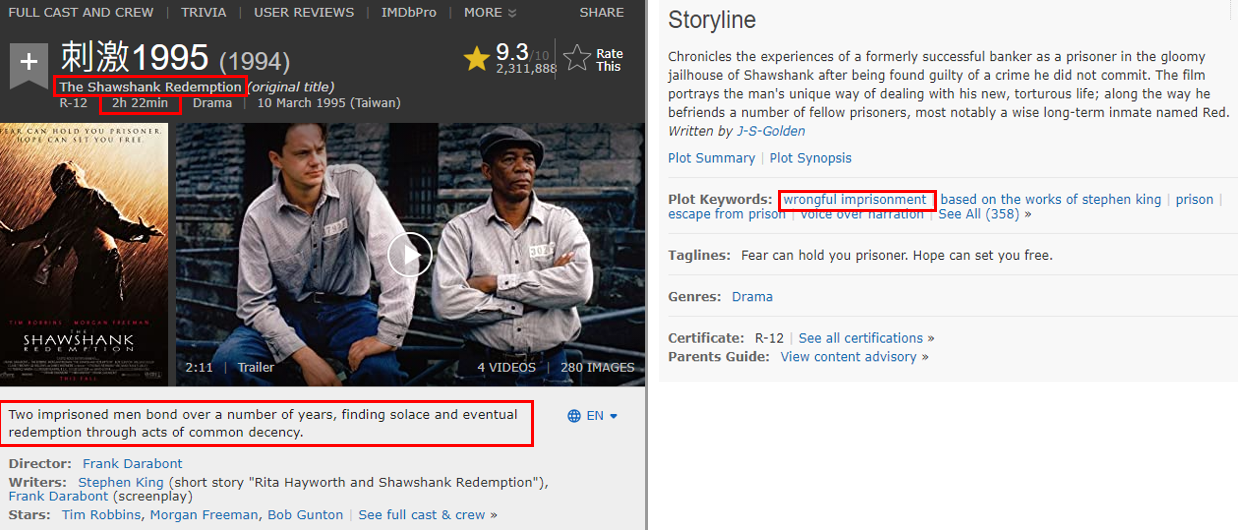
    

### <span style="color:red "> <答案>

In [ ]:
#有點小問題
from bs4 import BeautifulSoup
import requests

url = 'http://www.imdb.com/chart/top?ref_=nv_mv_250_6'
#你會發現你拿不到那個網址
result = requests.get(url)
text = result.text
soup = BeautifulSoup(text,"lxml")

summary = soup.find('div',{'class':'article'})

for row in summary.find('tbody').findAll('tr'):   
            target=row.find('td',{'class':'titleColumn'}).find('a')
            print(target)

In [ ]:
from bs4 import BeautifulSoup
import requests

url = 'http://www.imdb.com/chart/top?ref_=nv_mv_250_6'

result = requests.get(url)
text = result.text
soup = BeautifulSoup(text,"lxml")

summary = soup.find('div',{'class':'article'})

for row in summary.find('tbody').findAll('tr'):
            item =row.find('td',{'class':'titleColumn'})     
            
            #要把電影編號拿出來
            num=item.text.split()[0][0]
            print(item.text.split())
            #我們需要這個電影編號，才可以獲得相關資訊的網頁
            
            href=item.find('a')
            imdb = "http://www.imdb.com"+href.get('href')+'?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=359Y6R1VZ5V1FZ0BJYK3&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_'+num
            
            #開始爬新網頁
            iresult = requests.get(imdb)
            target = iresult.text
            isoup = BeautifulSoup(target,"lxml")
            
            #把電影說明取出來
            #用strip去除頭尾的空格
            print(isoup.find('span',{'class':'GenresAndPlot__TextContainerBreakpointXL-cum89p-2 gCtawA'}).getText().strip())
            
            
            #把電影的關鍵字取出來
            for item in isoup.find('div',{'class':'ipc-chip-list Keywords__PlotKeywords-ke3vmf-0 bHzejW'}).findAll('a'):
                 print(item.text)
            
            
            #把電影時間長度取出來
            print(isoup.findAll('li',{'class':'ipc-inline-list__item'})[2].text.strip())
            
            
            #把英文名字存出來
            #因為有內嵌元素，所以拿到的text要再split一下才可以用
            print('英文名字:', isoup.find('div',{'class':'OriginalTitle__OriginalTitleText-jz9bzr-0 llYePj'}).text.split(':')[1])
           


In [ ]:
from bs4 import BeautifulSoup
import requests

url = 'http://www.imdb.com/chart/top?ref_=nv_mv_250_6'

result = requests.get(url)
text = result.text
soup = BeautifulSoup(text,"lxml")

summary = soup.find('div',{'class':'article'})

for row,i in zip(summary.find('tbody').findAll('tr'),range(len(summary.find('tbody').findAll('tr')))):
    
            item =row.find('td',{'class':'titleColumn'}) 
            i=i+1
            
            href=item.find('a')
            imdb = "http://www.imdb.com"+href.get('href')+\
                   '?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1'+\
                   '&pf_rd_r=359Y6R1VZ5V1FZ0BJYK3&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_'+str(i)
            
            #開始爬新網頁
            iresult = requests.get(imdb)
            target = iresult.text
            isoup = BeautifulSoup(target,"lxml")
            
            #把電影說明取出來
            #用strip去除頭尾的空格
            print(isoup.find('span',{'class':'GenresAndPlot__TextContainerBreakpointXL-cum89p-2 gCtawA'}).getText().strip())
            
            
            #把電影的關鍵字取出來
            for item in isoup.find('div',{'class':'ipc-chip-list Keywords__PlotKeywords-ke3vmf-0 bHzejW'}).findAll('a'):
                 print(item.text)
            
            
            #把電影時間長度取出來
            print(isoup.findAll('li',{'class':'ipc-inline-list__item'})[2].text.strip())
            
            
            #把英文名字存出來
            #因為有內嵌元素，所以拿到的text要再split一下才可以用
            print('英文名字:', isoup.find('div',{'class':'OriginalTitle__OriginalTitleText-jz9bzr-0 llYePj'}).text.split(':')[1])
           

### <span style="color:red "> <番外篇>你知道為什麼我們拿到的網址怪怪的嗎??是Agent

In [ ]:
from bs4 import BeautifulSoup
import requests

url = 'http://www.imdb.com/chart/top?ref_=nv_mv_250_6'
headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36',
          }
result = requests.get(url,headers=headers)
text = result.text
soup = BeautifulSoup(text,"lxml")

summary = soup.find('div',{'class':'article'})

for row,i in zip(summary.find('tbody').findAll('tr'),range(len(summary.find('table').findAll('tr')))):
    
            target=row.find('td',{'class':'titleColumn'}).find('a')
            print(target)

# <span style="color:red ">最後組合在一起，用pandas存起來

# <span style="color:red "> <測驗題>

---
把前面幾個步驟組合起來，然後把你的資料用pandas儲存起來， 輸出一個CSV檔
    

### <span style="color:red "> <答案>

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

from time import sleep

from ipywidgets import FloatProgress
from IPython.display import display


import pickle

url = 'http://www.imdb.com/chart/top?ref_=nv_mv_250_6'

headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36',
          }
result = requests.get(url,headers=headers)
text = result.text
soup = BeautifulSoup(text,"lxml")

summary = soup.find('div',{'class':'article'})

# Create empty lists to append the extracted data.

year = []            #年份資料
rating = []          #評分資料
ratingoutof = []     #評分人數資料
movieZHname = []     #中文名稱資料
cast = []            #卡司資料
description = []     #簡介資料
keyword = []         #關鍵字資料
movielength = []     #片長資料
movieENname = []     #英文名稱資料


#做一條血條，看看進度
f = FloatProgress(min=0, max=250)
display(f)

for row,i in zip(summary.find('tbody').findAll('tr'),range(len(summary.find('tbody').findAll('tr')))):
    
    #把年份的資料提取出來    
    sitem=row.find('span',{'class':'secondaryInfo'})
    s = sitem.text
    print(s[1:5])
    year.append(s[1:5])
    
    
    #把評分取出來
    iget=row.find('strong')
    print(iget.text)
    #把評分人數弄出來
    rating.append(iget.text)
    print(iget.get('title').split(' ')[3])
    ratingoutof.append(iget.get('title').split(' ')[3])
     
    for item in row.findAll('td',{'class':'titleColumn'}):
            href=item.find('a')
            #print(href)
            
            #把中文名字存出來
            print(href.text)
            movieZHname.append(href.text)            
            
            #把卡司存出來
            cast.append(href.get('title'))
            print(href.get('title'))
             
            
            imdb = "http://www.imdb.com"+href.get('href')
                    
            iresult = requests.get(imdb)
            target = iresult.text
            isoup = BeautifulSoup(target,"lxml")
            
            #把電影簡介存出來
            print(isoup.find('span',{'class':'GenresAndPlot__TextContainerBreakpointXL-cum89p-2 gCtawA'}).getText().strip())
            description.append(isoup.find('span',{'class':'GenresAndPlot__TextContainerBreakpointXL-cum89p-2 gCtawA'}).getText().strip())
            
            #把關鍵字存出來
            keyword=[]
            for item in isoup.find('div',{'class':'ipc-chip-list Keywords__PlotKeywords-ke3vmf-0 bHzejW'}).findAll('a'):
                  print(item.text)
                  keyword.append('item.text')
                
            keyword.append(keyword)
            
            #把片長存出來
            print(isoup.findAll('li',{'class':'ipc-inline-list__item'})[2].text.strip())
            movielength.append(isoup.findAll('li',{'class':'ipc-inline-list__item'})[2].text.strip())

            #把英文名字存出來
            #因為有些片沒有英文名字，如果我不處理，順序就會跳片
            
            if isoup.find('div',{'class':'OriginalTitle__OriginalTitleText-jz9bzr-0 llYePj'}):
                print('英文名字:', isoup.find('div',{'class':'OriginalTitle__OriginalTitleText-jz9bzr-0 llYePj'}).text.split(':')[1])
                movieENname.append(isoup.find('div',{'class':'OriginalTitle__OriginalTitleText-jz9bzr-0 llYePj'}).text.split(':')[1])
            else:
                movieENname.append('') 

            
    sleep(.1)
    f.value = i


In [ ]:
#利用{}把欄位名和資料一次搞定
imdb_df = pd.DataFrame({'電影中文名字':movieZHname,
                        '電影英文名字':movieENname,
                        '出版年份':year,
                        '評分':rating,
                        '評分人數':ratingoutof,
                        '簡介':description,
                        '劇情類型':keyword,
                        '電影長度':movielength,
                        '卡司':cast
                      })
imdb_df

In [ ]:
imdb_df.to_excel("imdbdataexport.xlsx")